In [23]:
import os
import pandas as pd

# Define the file path
file_path = '/kaggle/input/crop-production/crop_production_dataset.csv'

# Check if the file exists
if os.path.exists(file_path):
    print("File found. Loading data...")
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path, delimiter=';')
    
    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print("File not found. Please check the file path.")

    

File found. Loading data...
         District Soil Type  pH Level  Organic Matter (%)  \
0   West District     Silty      6.17                2.05   
1  North District     Silty      7.42                1.56   
2  South District     Silty      7.26                2.90   
3   West District     Loamy      6.92                2.50   
4  South District     Loamy      7.26                2.86   

   Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
0                     34.42                       15.20   
1                     43.19                       10.24   
2                     41.89                       10.44   
3                     40.58                       15.49   
4                     42.98                       15.13   

   Potassium Content (kg/ha)  
0                      23.81  
1                      18.71  
2                      22.79  
3                      20.07  
4                      21.37  


*The dataset includes soil information such as pH levels, organic matter, and nutrient contents (Nitrogen, Phosphorus, Potassium) across various districts and soil types.*

In [24]:
import statsmodels.api as sm

# Define the independent variables (features) and dependent variables (targets)
X = df[['pH Level', 'Organic Matter (%)']]
y_nitrogen = df['Nitrogen Content (kg/ha)']
y_phosphorus = df['Phosphorus Content (kg/ha)']
y_potassium = df['Potassium Content (kg/ha)']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model for Nitrogen
model_nitrogen = sm.OLS(y_nitrogen, X).fit()
print("Nitrogen Content Model Summary:")
print(model_nitrogen.summary())

# Fit the model for Phosphorus
model_phosphorus = sm.OLS(y_phosphorus, X).fit()
print("Phosphorus Content Model Summary:")
print(model_phosphorus.summary())

# Fit the model for Potassium
model_potassium = sm.OLS(y_potassium, X).fit()
print("Potassium Content Model Summary:")
print(model_potassium.summary())


Nitrogen Content Model Summary:
                               OLS Regression Results                               
Dep. Variable:     Nitrogen Content (kg/ha)   R-squared:                       0.002
Model:                                  OLS   Adj. R-squared:                 -0.000
Method:                       Least Squares   F-statistic:                    0.9730
Date:                      Wed, 28 Aug 2024   Prob (F-statistic):              0.378
Time:                              22:00:19   Log-Likelihood:                -2887.5
No. Observations:                      1000   AIC:                             5781.
Df Residuals:                           997   BIC:                             5796.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

*The model summaries for Nitrogen, Phosphorus, and Potassium Content show that none of the predictors—pH Level and Organic Matter (%)—have a statistically significant impact on the respective nutrient contents. For Nitrogen Content, the R-squared value is 0.002, with an F-statistic of 0.9730 (p=0.378), indicating a poor model fit. Similarly, the Phosphorus Content model has an R-squared of 0.001 and an F-statistic of 0.3341 (p=0.716), while the Potassium Content model shows an R-squared of 0.001 and an F-statistic of 0.4643 (p=0.629). These results suggest that the pH Level and Organic Matter (%) do not significantly explain variations in Nitrogen, Phosphorus, or Potassium Content in the dataset.*

        PC1       PC2
0 -0.721010  0.604279
1  2.341668 -1.974322
2 -0.179032 -1.286388
3  0.239620  0.511902
4 -0.233968 -0.071104


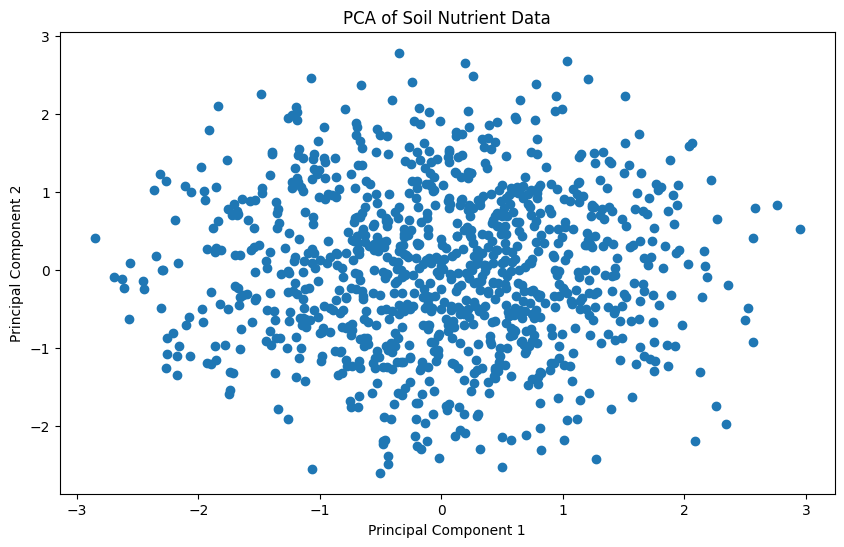

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data for PCA
features = ['pH Level', 'Organic Matter (%)', 'Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)']
X = df[features]

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Number of components can be adjusted
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pc_df.head())

# Plot PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'])
plt.title('PCA of Soil Nutrient Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Principal Component Analysis (PCA) Summary
The PCA on the soil nutrient dataset reduces the dimensionality to two principal components. After standardizing the data, the first few rows of the principal components are:

PC1: -0.721, 2.342, -0.179, 0.240, -0.234
PC2: 0.604, -1.974, -1.286, 0.512, -0.071
The scatter plot of these principal components shows the distribution and relationships between samples in the reduced feature space.



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


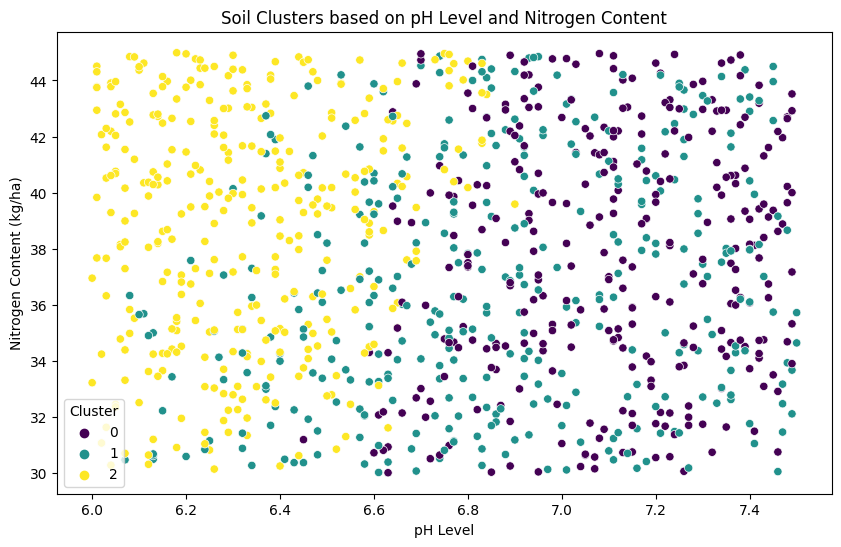

In [27]:
from sklearn.cluster import KMeans

# Choose the number of clusters
n_clusters = 3  # You can adjust this
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Plot clusters
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pH Level', y='Nitrogen Content (kg/ha)', hue='Cluster', palette='viridis')
plt.title('Soil Clusters based on pH Level and Nitrogen Content')
plt.xlabel('pH Level')
plt.ylabel('Nitrogen Content (kg/ha)')
plt.show()


**K-Means Clustering Summary**
Clustering: Applied K-Means clustering with 3 clusters on standardized soil nutrient data.
Clusters Added: Cluster labels are appended to the original DataFrame.
Plot: The scatter plot illustrates the distribution of soil samples based on pH level and nitrogen content, color-coded by cluster.
The scatter plot helps visualize the clustering of soil samples, showing how different clusters group based on these two features.

In [29]:
# Define weights for each component (you can adjust these)
weights = {'pH Level': 0.2, 'Organic Matter (%)': 0.3, 'Nitrogen Content (kg/ha)': 0.2, 'Phosphorus Content (kg/ha)': 0.2, 'Potassium Content (kg/ha)': 0.1}

# Normalize each component (0 to 1 scale)
df['Soil Fertility Index'] = (df['pH Level'] / df['pH Level'].max() * weights['pH Level'] +
                              df['Organic Matter (%)'] / df['Organic Matter (%)'].max() * weights['Organic Matter (%)'] +
                              df['Nitrogen Content (kg/ha)'] / df['Nitrogen Content (kg/ha)'].max() * weights['Nitrogen Content (kg/ha)'] +
                              df['Phosphorus Content (kg/ha)'] / df['Phosphorus Content (kg/ha)'].max() * weights['Phosphorus Content (kg/ha)'] +
                              df['Potassium Content (kg/ha)'] / df['Potassium Content (kg/ha)'].max() * weights['Potassium Content (kg/ha)'])

print(df[['District', 'Soil Fertility Index']].head())


         District  Soil Fertility Index
0   West District              0.786674
1  North District              0.734483
2  South District              0.876979
3   West District              0.867320
4  South District              0.924256


**The Soil Fertility Index** 
It measures soil quality across different districts. In the West District, the index values are 0.786674 and 0.867320, indicating a relatively good level of soil fertility. The North District has an index of 0.734483, suggesting slightly lower fertility compared to the West District. In the South District, the index values are notably higher at 0.876979 and 0.924256, reflecting superior soil fertility. These values help in understanding the variation in soil quality across different regions.

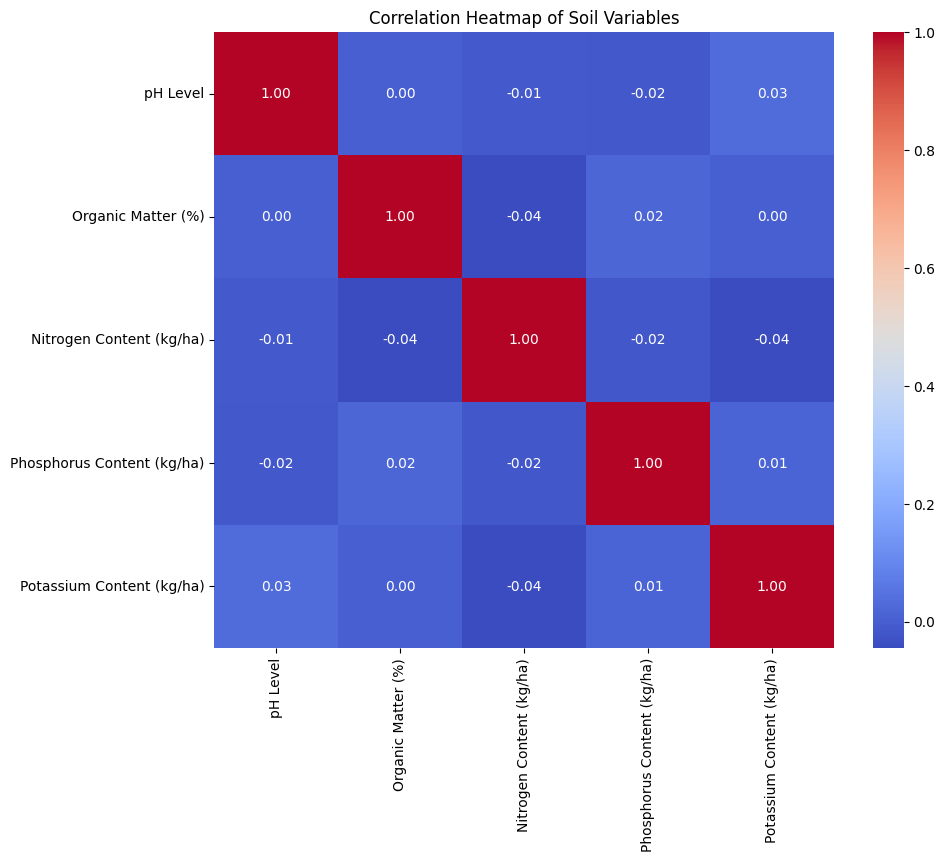

In [37]:
import seaborn as sns

# Calculate correlations
correlation_matrix = df[features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Soil Variables')
plt.show()


**The correlation heatmap** provides insights into the relationships between various soil variables. The heatmap uses a color gradient to indicate the strength and direction of correlations between features such as pH Level, Organic Matter, Nitrogen Content, Phosphorus Content, and Potassium Content. Positive correlations are shown in warmer colors, while negative correlations are depicted in cooler colors. This visualization helps identify which variables are strongly associated with each other, guiding further analysis and decision-making.



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = df[['pH Level', 'Organic Matter (%)']]
y = df['Nitrogen Content (kg/ha)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 26.06238158122455


**Random Forest Regression Model Evaluation**
The Random Forest Regressor was trained using features pH Level and Organic Matter (%) to predict Nitrogen Content (kg/ha). The dataset was split into training (80%) and testing (20%) sets. After training the model with 100 estimators, the Mean Squared Error (MSE) on the test set was calculated to be 26.06. This metric indicates the average squared difference between the predicted and actual values, providing a measure of the model's prediction accuracy.



In [39]:
# Calculate nutrient use efficiency
df['Nitrogen Efficiency'] = df['Nitrogen Content (kg/ha)'] / df['Organic Matter (%)']
df['Phosphorus Efficiency'] = df['Phosphorus Content (kg/ha)'] / df['Organic Matter (%)']
df['Potassium Efficiency'] = df['Potassium Content (kg/ha)'] / df['Organic Matter (%)']

print(df[['District', 'Nitrogen Efficiency', 'Phosphorus Efficiency', 'Potassium Efficiency']].head())


         District  Nitrogen Efficiency  Phosphorus Efficiency  \
0   West District            16.790244               7.414634   
1  North District            27.685897               6.564103   
2  South District            14.444828               3.600000   
3   West District            16.232000               6.196000   
4  South District            15.027972               5.290210   

   Potassium Efficiency  
0             11.614634  
1             11.993590  
2              7.858621  
3              8.028000  
4              7.472028  


**Soil Nutrient Efficiency Data**
It includes Nitrogen, Phosphorus, and Potassium Efficiency, indicating how effectively each nutrient is utilized. For example, the West District shows a Nitrogen Efficiency of 16.79, Phosphorus Efficiency of 7.41, and Potassium Efficiency of 11.61, while the North District has a Nitrogen Efficiency of 27.69 and a Phosphorus Efficiency of 6.56. This data helps assess and compare nutrient use efficiency in different regions.